## Quant Research:

* Analysing the distribution of a stock returns
* Deriving a stock beta
* Determining correlations between two or more stocks
* Calculating rate of change
* Backtesting a strategy

While choosing portfolio, choose uncorelated stocks

Decide your strategy as per the momentum of the market.


### Backtest Moving Average Crossover on multiple Stocks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# 1. Fetch the stock data
data = pd.read_csv('/home/rvl224/Downloads/aapl_daily_data.csv', index_col = 0, parse_dates = True)
df = pd.DataFrame(data)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,1.159,1.161,1.143,1.150,0.991,278588800
2005-01-03,1.157,1.163,1.118,1.130,0.973,691992000
2005-01-04,1.139,1.169,1.124,1.142,0.983,1096810400
2005-01-05,1.151,1.165,1.144,1.152,0.992,680433600
2005-01-06,1.155,1.159,1.131,1.153,0.993,705555200
...,...,...,...,...,...,...
2021-02-12,134.350,135.530,133.690,135.370,135.370,60029300
2021-02-16,135.490,136.010,132.790,133.190,133.190,80206200
2021-02-17,131.250,132.220,129.470,130.840,130.840,97918500


In [14]:
#Strategy Params
sma = 10
lma = 20

In [23]:
# 2. Calculate buy and hold returns
data['d_returns'] = data['Adj Close'].pct_change()

In [24]:
# 3. Calculate rules- moving aveages
data['sma'] = data['Adj Close'].rolling(sma).mean()
data['lma'] = data['Adj Close'].rolling(lma).mean()

In [25]:
# 4. calculate trading signals
data['signals'] = np.where(data['sma'] >= data['lma'], 1, -1)

In [26]:
# Dropping Null Values
data.dropna(inplace = True)

In [27]:
# 5. Calculate strategy returns
data['s_returns'] = data['d_returns']*data['signals'].shift(1)

In [28]:
# Cumulative returns
cum_s_returns = (data['s_returns']+1).cumprod()

In [29]:
#Net returns
print('Cumulative strategy returns:', round(cum_s_returns.iloc[-1] -1, 3))

Cumulative strategy returns: 3.419


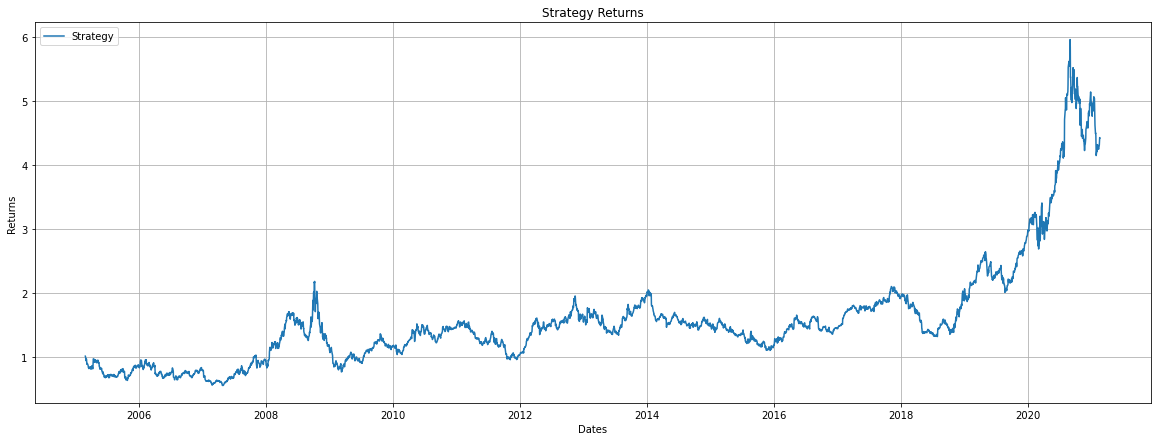

In [33]:
#Visualize

plt.figure(figsize = (20,7))
plt.plot(cum_s_returns, label = 'Strategy')
plt.title('Strategy Returns')
plt.xlabel('Dates')
plt.ylabel('Returns')
plt.grid()
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

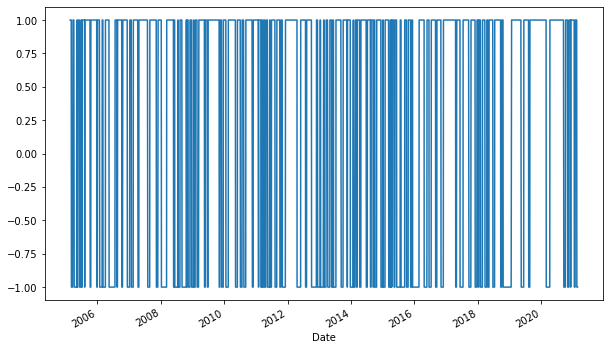

In [34]:
data['signals'].plot(figsize = (10,6))

Text(0, 0.5, 'Signals')

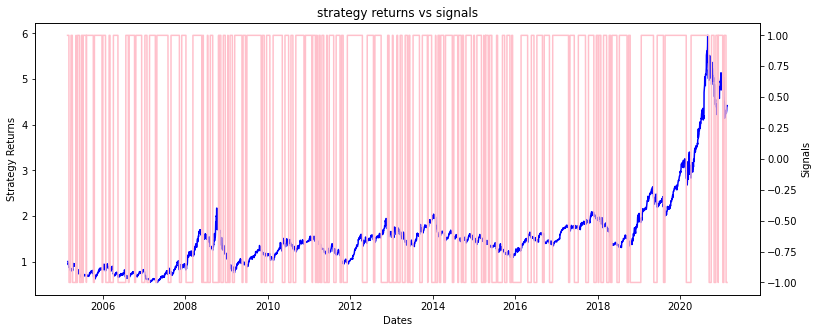

In [37]:
# Visualize strategy returns vs signals
fig, ax1 = plt.subplots(figsize =(13,5))

ax2 = ax1.twinx()
ax1.plot(cum_s_returns, color = 'blue')
ax2.plot(data['signals'], color = 'pink')

ax1.set_title('strategy returns vs signals')
ax1.set_xlabel('Dates')
ax1.set_ylabel('Strategy Returns')
ax2.set_ylabel('Signals')